In [30]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as plt

In [53]:
survey = pd.read_csv('participants_survey.csv', delimiter=";")
survey = survey.drop('time_record',axis=1)
# survey = survey.set_index('roomid')

In [54]:
survey

,sleep_hours,happiness,noise_level,roomid,light,dba,team
0,5,5,0,405,750,45,flipover
1,5,3,1,405,750,45,flipover
2,5,3,1,405,750,45,flipover
3,5,5,1,405,750,45,flipover
4,6,5,0,405,750,45,flipover
5,5,4,1,405,750,45,flipover
6,3,4,1,405,750,45,flipover
7,4,5,1,405,750,45,flipover
8,0,4,1,405,750,45,officehealth
9,5,3,0,405,750,45,officehealth


,happiness,people_number
happiness,1.000000,-0.583825
people_number,-0.583825,1.000000


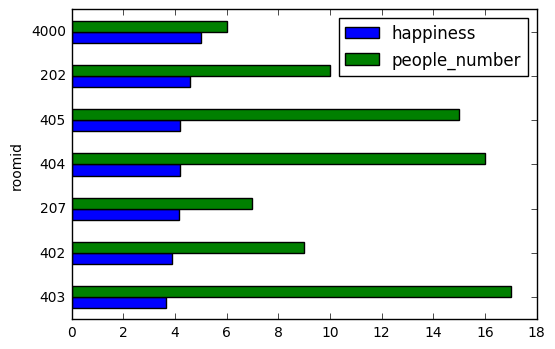

In [114]:
happiness_room_avg = pd.DataFrame(survey.groupby('roomid').happiness.sum() / survey['roomid'].value_counts())
happiness_room_avg['people_number'] = survey.groupby('roomid')['team'].count()
# happiness_room_avg.rename(['happiness','people_number'],inplace=True)
# happiness_room_avg = happiness_room_avg.set_index('happiness')
happiness_room_avg.columns = ['happiness','people_number']
happiness_room_avg = happiness_room_avg.set_index(survey.groupby('roomid')['team'].count().index)
h = happiness_room_avg.sort_values(by='happiness')
h.plot(kind="barh")
h.corr()

In [115]:
happiness_room_avg

,happiness,people_number
roomid,,
202,4.600000,10
207,4.142857,7
402,3.888889,9
403,3.647059,17
404,4.187500,16
405,4.200000,15
4000,5.000000,6


In [122]:
sleep_hours = pd.DataFrame(survey.groupby('happiness').sleep_hours.sum())
sleep_hours['people_number'] = survey.groupby('happiness')['team'].count()
sleep_hours['sleep_avg'] = sleep_hours['sleep_hours'] / sleep_hours['people_number']
sleep_hours


,sleep_hours,people_number,sleep_avg
happiness,,,
1,13,3,4.333333
2,4,1,4.000000
3,39,8,4.875000
4,175,37,4.729730
5,142,31,4.580645


In [126]:
happiness_room_sleeping = pd.DataFrame(survey.groupby('roomid').sleep_hours.mean())
happiness_room_sleeping

,sleep_hours
roomid,
202,5.300000
207,5.571429
402,4.888889
403,4.647059
404,4.250000
405,4.333333
4000,4.166667
